In [4]:
# # import pandas as pd
# # import numpy as np
# # from xgboost import XGBRegressor
# # from sklearn.metrics import mean_squared_error
# # from sklearn.model_selection import train_test_split,cross_val_score

# # data=pd.read_csv('train.csv',index_col=0)

# # # X,Y=data.drop('Strength',axis=1),data.Strength

# # # x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)



# # # xgb=XGBRegressor()



# pred=xgb.fit(x_train,y_train).predict(x_test)

# np.sqrt(mean_squared_error(y_test,pred))

In [104]:
# Lib
import pandas as pd
import numpy as np
data=pd.read_csv('train.csv',index_col=0)
# data.head()

In [105]:
# removing skew
data_2=data.copy()
data_2['AgeInDays']=np.log(data.AgeInDays)
data_2['BlastFurnaceSlag']=np.sqrt(data.BlastFurnaceSlag)
data_2['SuperplasticizerComponent']=np.sqrt(data.SuperplasticizerComponent)
data_2['FlyAshComponent']=np.cbrt(data.FlyAshComponent)
# data_2.skew()

In [119]:
X,Y=data.drop('Strength',axis=1),data.Strength

# Feature engineering

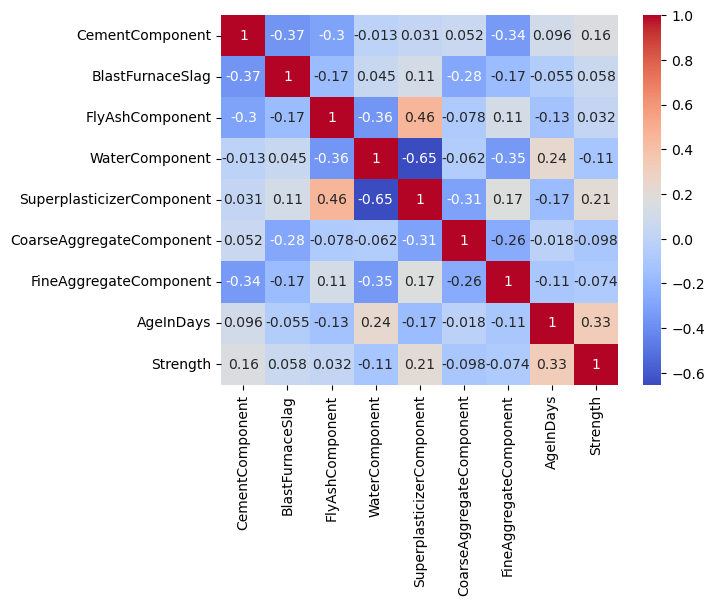

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

corr=data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [126]:
# Create a heatmap trace
heatmap = go.Heatmap(
    z=corr.values, # correlation matrix values
    x=corr.index.values, # column names as x-axis labels
    y=corr.columns.values, # row names as y-axis labels
    colorscale='RdBu', # color scale
    colorbar=dict(title='Correlation<br>Coefficient', titleside='right'), # colorbar title
)

# Define the layout
layout = go.Layout(
    title='Correlation Heatmap',
    width=600,
    height=600,
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
)

# Create a Figure object
fig = go.Figure(data=[heatmap], layout=layout)

# Show the plot
fig.show()

# XGB

In [62]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
from sklearn.model_selection import train_test_split,cross_val_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=97)


# Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb=XGBRegressor(subsample= 1, n_estimators = 80, min_child_weight= 10,
                  max_depth= 2, learning_rate=0.089, colsample_bytree= 0.8,reg_alpha=.01,reg_lambda=27.6)

xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')

RMSE: 11.379994367535284


In [129]:
11.397883864533059-11.379994367535284

0.017889496997774756

In [57]:
2/10

0.2

In [141]:
# Data
from sklearn.model_selection import train_test_split,cross_val_score

X,Y=data.drop('Strength',axis=1),data_2.Strength
random=[i/10 for i in range(0,300)]
x=['reg:squarederror', 'reg:linear', 'reg:squaredlogerror', 'reg:gamma', 'reg:tweedie', 'rank:pairwise', 'rank:ndcg', 'rank:map', 'survival:cox']
#random_state min and max value
loss={}
for i in x:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=97)
    

    # Model
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_error

    xgb=XGBRegressor(subsample= 1,  nthread = 4, n_estimators = 80, min_child_weight= 10,
                      max_depth= 2, learning_rate=0.089, colsample_bytree= 0.8,reg_alpha =0.01,reg_lambda=27.6,objective=i)

    xgb.fit(x_train,y_train)
    pred=xgb.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    loss[i]=rmse
    print(f'HyperParameter: {i}\nRMSE: {rmse}')

HyperParameter: reg:squarederror
RMSE: 11.379994367535284
[05:45:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
HyperParameter: reg:linear
RMSE: 11.379994367535284
HyperParameter: reg:squaredlogerror
RMSE: 20.863894158890997
HyperParameter: reg:gamma
RMSE: 11.913482332314992
HyperParameter: reg:tweedie
RMSE: 11.459926623604698
HyperParameter: rank:pairwise
RMSE: 37.732803730053504
HyperParameter: rank:ndcg
RMSE: 37.92610689114649
HyperParameter: rank:map
RMSE: 37.92610689114649
HyperParameter: survival:cox
RMSE: 37.72751712381035


In [143]:
result = {k:v for k,v in loss.items() if v == 11.379994367535284}
result

{'reg:squarederror': 11.379994367535284, 'reg:linear': 11.379994367535284}

In [142]:
min(loss.values())

11.379994367535284

In [ ]:
# Skew
import numpy as np


import plotly.express as exp
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig=make_subplots(1,2)

fig.add_trace(go.Histogram(x=data.AgeInDays))

# Add a chart to the second subplot
fig.add_trace(go.Histogram({'x':np.log(data.AgeInDays)}), row=1, col=2)

# Update the layout of the figure
fig.update_layout(title='My Subplots', height=300, width=800)

# Show the figure
fig.show()



# GradientBoostingRegressor       12.00

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=33)
rmse=[]
for i in range(10):
    gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.07,n_estimators=110,subsample=0.35,
                             criterion='squared_error',min_samples_split=0.08,min_samples_leaf=17,max_depth=68)
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
print(f'RMSE: {sum(rmse)/len(rmse)}')

RMSE: 11.341147130606293


In [1]:
# Randome state No effect
random=[i for i in range (0,100)]

rs={}
for i in random:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.07)
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    rs[i]=rmse
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')



min(rs.values())

result = {k:v for k,v in rs.items() if v == 11.360539810854064}
result

NameError: name 'train_test_split' is not defined

In [89]:
# 
# losses = ['absolute_error', 'squared_error', 'huber', 'quantile']
random=[i for i in range(1,100)]
# print(losses)
# n_estimators=[]
# criterions = ['friedman_mse', 'squared_error']
d={}
for i in random:
        gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.07,n_estimators=110,subsample=0.35,
                                      criterion='friedman_mse',min_samples_split=0.08,
                                      min_samples_leaf=17,max_depth=68)
        gbr.fit(x_train,y_train)
        pred=gbr.predict(x_test)
        rmse=np.sqrt(mean_squared_error(y_test,pred))
        d[i]=rmse
        print(f'Hyper Parameter {i}, RMSE: {rmse}')

#         print(f'Loss: {i}; RMSE: {rmse}')

Hyper Parameter 1, RMSE: 11.35726567781878
Hyper Parameter 2, RMSE: 11.374389613810015
Hyper Parameter 3, RMSE: 11.33313018525573
Hyper Parameter 4, RMSE: 11.403570551342046
Hyper Parameter 5, RMSE: 11.332766031882755
Hyper Parameter 6, RMSE: 11.408151202277402
Hyper Parameter 7, RMSE: 11.326078873760567


KeyboardInterrupt: 

In [83]:
min(d.values())

11.251181692005972

In [84]:
result = {k:v for k,v in d.items() if v == 11.251181692005972}
result

{68: 11.251181692005972}

# Voting regressor

In [107]:
from sklearn.ensemble import VotingRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

models=[]
xgb=XGBRegressor(subsample= 1, n_estimators = 80, min_child_weight= 10,
                  max_depth= 2, learning_rate=0.089, colsample_bytree= 0.8,reg_alpha=.01,reg_lambda=27.6)
models.append(('xgb',xgb))

gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.07,n_estimators=110,subsample=0.35,
                             criterion='squared_error',min_samples_split=0.08,min_samples_leaf=17,max_depth=68)
models.append(('gbm',gbr))

voting=VotingRegressor(models)
voting

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=2,
                                          max_leaves=None, min_child_weight=10,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=80, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('gbm',
                             GradientBoostingRegressor(criterion='squared_error',
                                                       learning_rate=0.07,
                                                       max_depth=68,
                                                       min_samples_leaf=17,
                                                       min_samples_split=0.08,
                                                       n_estimators=110,
                                                       subsample=0.35))])

In [108]:
from sklearn.model_selection import train_test_split,cross_val_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=97)

voting.fit(x_train,y_train)
pred=voting.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))

print(f'RMSE: {rmse}')

RMSE: 11.351451748915482


# Final

In [109]:
# Prediction and submission
test=pd.read_csv('test.csv',index_col=0)

# test.AgeInDays=np.log(test.AgeInDays)
# test['BlastFurnaceSlag']=np.sqrt(test.BlastFurnaceSlag)
# test['SuperplasticizerComponent']=np.sqrt(test.SuperplasticizerComponent)
# test['FlyAshComponent']=np.cbrt(test.FlyAshComponent)

final_pred=voting.predict(test)
final_df=pd.DataFrame()

final_df['id']=test.index
final_df['Strength']=final_pred
final_df.to_csv('submission.csv',index=False)
final_df.head()

,id,Strength
0,5407,47.627999
1,5408,20.626588
2,5409,32.929792
3,5410,47.807208
4,5411,32.052190


In [88]:
# Cross validation
# cross_val_score()
XGBRegressor
result=cross_val_score(XGBRegressor(subsample= 1, n_estimators = 80, min_child_weight= 10,
                  max_depth= 2, learning_rate=0.089, colsample_bytree= 0.8,reg_alpha=.01,reg_lambda=27.6),
                       X,Y,scoring='neg_root_mean_squared_error')

NameError: name 'XGBRegressor' is not defined

In [153]:
-result

array([11.9108855 , 12.13212277, 11.8847025 , 11.92062448, 12.90038575])